In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/CT_2013_2023.csv")
print(df.shape)
print(df.info())
print(df.head())

(228305, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228305 entries, 0 to 228304
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_year              228305 non-null  int64  
 1   ori                    228305 non-null  object 
 2   pub_agency_name        228305 non-null  object 
 3   pub_agency_unit        4026 non-null    object 
 4   agency_type_name       228305 non-null  object 
 5   state_abbr             228305 non-null  object 
 6   state_name             228305 non-null  object 
 7   division_name          228305 non-null  object 
 8   county_name            228305 non-null  object 
 9   region_name            228305 non-null  object 
 10  population_group_code  226681 non-null  object 
 11  population_group_desc  226681 non-null  object 
 12  offense_code           228305 non-null  object 
 13  offense_name           228305 non-null  object 
 14  offender_race          

In [ ]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
print("Missing Percentage by Column:")
print(missing_percent)

threshold = 60
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()
print("\nDropping columns with > {}% missing:".format(threshold), cols_to_drop)
df = df.drop(columns=cols_to_drop)

Missing Percentage by Column:
data_year                 0.000000
ori                       0.000000
pub_agency_name           0.000000
pub_agency_unit          98.236570
agency_type_name          0.000000
state_abbr                0.000000
state_name                0.000000
division_name             0.000000
county_name               0.000000
region_name               0.000000
population_group_code     0.711329
population_group_desc     0.711329
offense_code              0.000000
offense_name              0.000000
offender_race            44.267975
offender_ethnicity       44.267975
offender_age             48.026981
offender_sex             44.267975
victim_type_code          0.000000
victim_type_name          0.000000
location_code             0.000000
location_name             0.000000
weapon_code              90.624822
weapon_name              91.716344
prop_desc_code            0.031099
prop_desc_code.1          0.031099
prop_desc_name            0.031099
stolen_value             

In [ ]:
df['location_code'] = df['location_code'].astype('category')
df['location_code'] = df['location_code'].cat.add_categories('Unknown')
df['prop_desc_code'] = df['prop_desc_code'].astype('category')
df['prop_desc_code'] = df['prop_desc_code'].cat.add_categories('Unknown')

df = df.drop(columns=['prop_desc_code.1', 'ori', 'pub_agency_name', 'state_abbr', 'population_group_desc',
                      'offense_name', 'victim_type_name', 'location_name', 'prop_desc_name', 'recovered_value'])

In [ ]:
missing_data = pd.DataFrame({
    'Missing Counts': missing_counts,
    'Missing Percentage': round(missing_percent, 2)
})

missing_data = missing_data[missing_data['Missing Counts'] != 0]
missing_data.drop(columns=['Missing Counts'], inplace=True)
missing_data.sort_values(by='Missing Percentage', ascending=False, inplace=True)
rows_to_drop = ['population_group_desc', 'prop_desc_code', 'prop_desc_code.1']
missing_data.drop(rows_to_drop)

,Missing Percentage
pub_agency_unit,98.24
weapon_name,91.72
weapon_code,90.62
date_recovered,85.02
offender_age,48.03
offender_ethnicity,44.27
offender_race,44.27
offender_sex,44.27
population_group_code,0.71
stolen_value,0.28


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols, categorical_cols

(['data_year', 'offender_age', 'stolen_value'],
 ['agency_type_name',
  'state_name',
  'division_name',
  'county_name',
  'region_name',
  'population_group_code',
  'offense_code',
  'offender_race',
  'offender_ethnicity',
  'offender_sex',
  'victim_type_code',
  'location_code',
  'prop_desc_code',
  'recovered_flag'])

<ipython-input-9-646b0546097d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["recovered_flag"], y=df["offender_age"], palette="Blues", ax=axes[0])


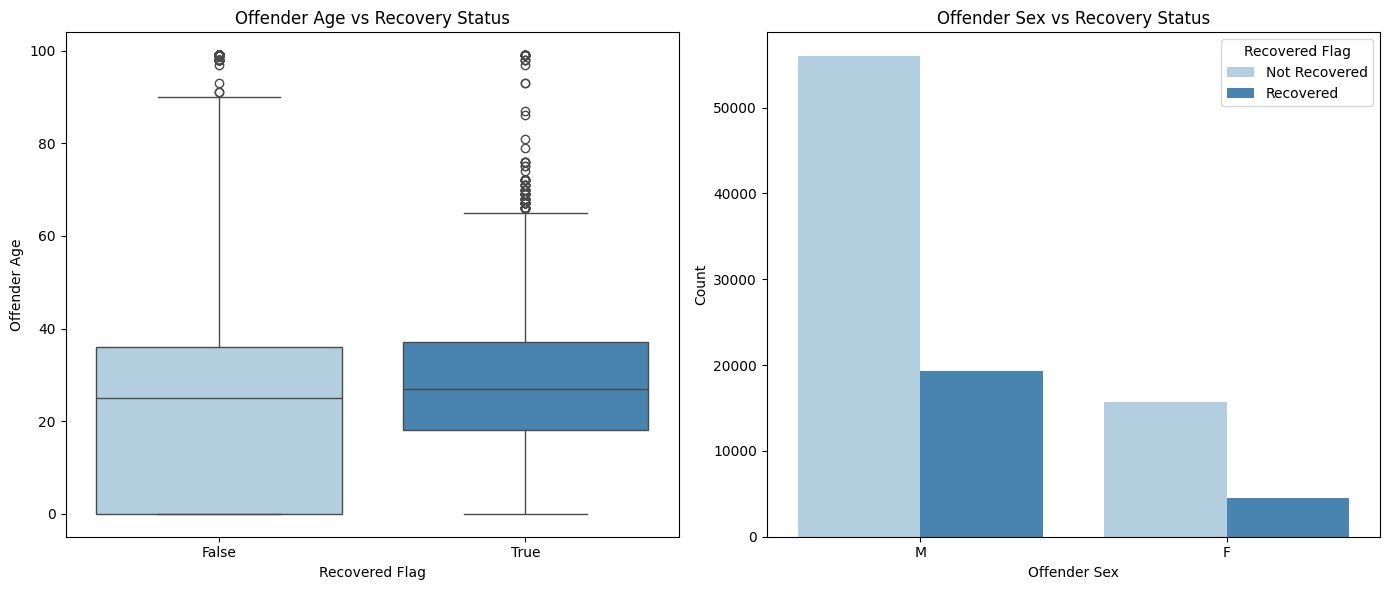

In [ ]:
import seaborn as sns
filtered_df = df[df["offender_sex"].isin(["M", "F"])]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x=df["recovered_flag"], y=df["offender_age"], palette="Blues", ax=axes[0])
axes[0].set_title("Offender Age vs Recovery Status")
axes[0].set_xlabel("Recovered Flag")
axes[0].set_ylabel("Offender Age")

sns.countplot(x=filtered_df["offender_sex"], hue=filtered_df["recovered_flag"], palette="Blues", ax=axes[1])
axes[1].set_title("Offender Sex vs Recovery Status")
axes[1].set_xlabel("Offender Sex")
axes[1].set_ylabel("Count")
axes[1].legend(title="Recovered Flag", labels=["Not Recovered", "Recovered"])

plt.tight_layout()
plt.show()

In [ ]:
df.offense_code.unique()

array(['23H', '23F', '240', '220', '23D', '270', '23C', '23G', '120',
       '35B', '35A', '26A', '11A', '100', '520', '290', '26B', '13A',
       '280', '26E', '13B', '250', '26F', '26C', '26G', '13C', '23E',
       '23A', '23B', '210', '39A', '200', '11D', '09A', '370', '26D',
       '510', '720', '11B', '64B', '09B', '36B', '11C'], dtype=object)

<ipython-input-99-e03dedbb3179>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_offense_categories)


[Text(0, 0, 'Theft From Motor Vehicle'),
 Text(1, 0, 'All Other Larceny'),
 Text(2, 0, 'Burglary/Breaking & Entering')]

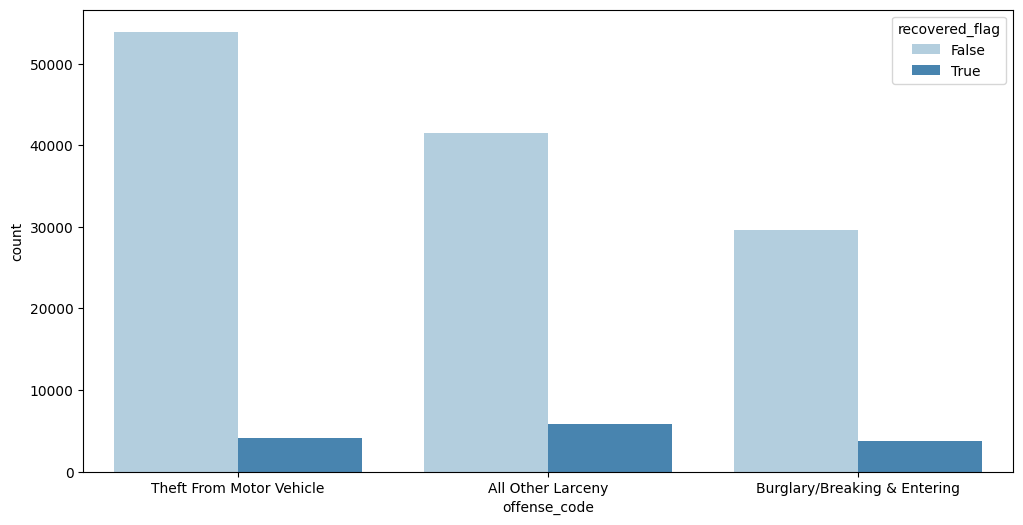

In [ ]:
top_offenses = df["offense_code"].value_counts().nlargest(3).index.tolist()

filtered_df = df[df["offense_code"].isin(top_offenses)]
top_offense_categories = [
    "Theft From Motor Vehicle",
    "All Other Larceny",
    "Burglary/Breaking & Entering"
]
filtered_df = df[df["offense_code"].isin(top_offenses)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x=filtered_df["offense_code"], hue=filtered_df["recovered_flag"], palette="Blues", order=top_offenses)
ax.set_xticklabels(top_offense_categories)

In [ ]:
num_imputer = SimpleImputer(strategy="median")
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

In [ ]:
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

In [ ]:
print("\nMissing counts after imputation/filling:")
print(df.isnull().sum())


Missing counts after imputation/filling:
data_year                0
agency_type_name         0
state_name               0
division_name            0
county_name              0
region_name              0
population_group_code    0
offense_code             0
offender_race            0
offender_ethnicity       0
offender_age             0
offender_sex             0
victim_type_code         0
location_code            0
prop_desc_code           0
stolen_value             0
recovered_flag           0
dtype: int64


In [ ]:
class_distribution = df['recovered_flag'].value_counts(normalize=True)
class_distribution = class_distribution.round(2)
class_distribution

,proportion
recovered_flag,
0,0.85
1,0.15


In [ ]:
nominal_columns = ['agency_type_name', 'state_name', 'division_name', 'county_name', 'region_name',
                   'offense_code', 'population_group_code', 'offender_race', 'offender_ethnicity', 'offender_sex',
                   'victim_type_code', 'location_code', 'prop_desc_code']

df = pd.get_dummies(df, columns=nominal_columns)

In [ ]:
df = df[df['recovered_flag'] != 'Unknown']
encoder = LabelEncoder()

df['recovered_flag'] = encoder.fit_transform(df['recovered_flag'])

print("Data type of 'recovered_flag' after encoding:", df['recovered_flag'].dtype)
print("Classes:", encoder.classes_)

Data type of 'recovered_flag' after encoding: int64
Classes: [False True]


<ipython-input-10-da5adf920461>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recovered_flag'] = encoder.fit_transform(df['recovered_flag'])


In [ ]:
#df = df.drop(columns=['data_year', 'offender_race_Unknown', 'offender_ethnicity_Unknown', 'offender_sex_Unknown'])

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('recovered_flag', axis=1)
y = df['recovered_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote = pd.Series(y_train_smote).astype(bool)

class_counts = y_train_smote.value_counts()

class_distribution_table = pd.DataFrame({
    'recovered_flag': class_counts.index.map({False: "False", True: "True"}),
    'proportion': class_counts.values / class_counts.sum()
})
class_distribution_table.set_index('recovered_flag', inplace=True)
class_distribution_table

,proportion
recovered_flag,
False,0.5
True,0.5


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
feature_importances = rf_model.feature_importances_

features = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': feature_importances
})

features.sort_values(by='Importance', ascending=False, inplace=True)
print(features)

                                Feature  Importance
2                          stolen_value    0.071384
1682                 prop_desc_code_3.0    0.057087
1565                   offense_code_240    0.053370
1                          offender_age    0.039246
1619                     offender_sex_M    0.035323
...                                 ...         ...
104   county_name_ALLEGHENY, WASHINGTON    0.000000
110                   county_name_AMITE    0.000000
929       county_name_LINCOLN, MARSHALL    0.000000
535                  county_name_DONLEY    0.000000
1748             prop_desc_code_Unknown    0.000000

[1749 rows x 2 columns]


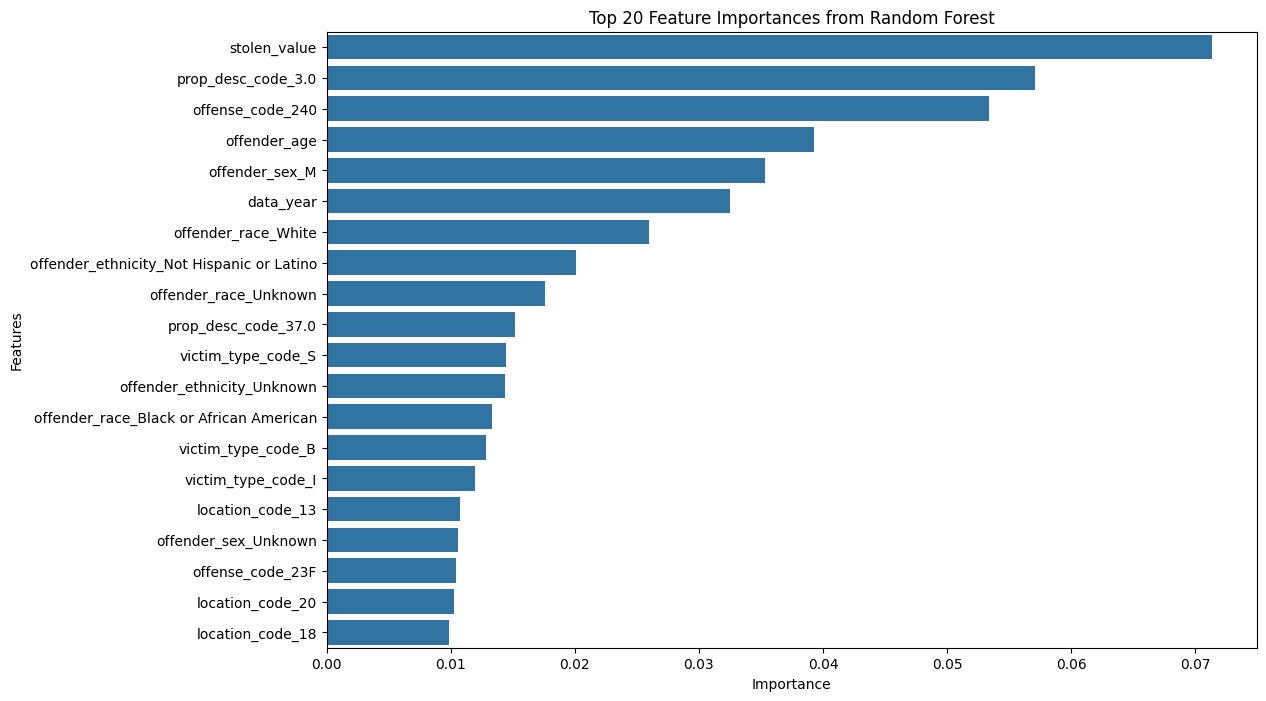

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
top_features = features.sort_values(by='Importance', ascending=False).head(20)  # Adjust the number based on your preference

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
threshold = 0.01  # Keep features with at least 1% importance
selected_features = features[features['Importance'] > threshold]['Feature'].tolist()
X_train_selected = X_train_smote[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
X_train_selected.columns

Index(['stolen_value', 'prop_desc_code_3.0', 'offense_code_240',
       'offender_age', 'offender_sex_M', 'data_year', 'offender_race_White',
       'offender_ethnicity_Not Hispanic or Latino', 'offender_race_Unknown',
       'prop_desc_code_37.0', 'victim_type_code_S',
       'offender_ethnicity_Unknown', 'offender_race_Black or African American',
       'victim_type_code_B', 'victim_type_code_I', 'location_code_13',
       'offender_sex_Unknown', 'offense_code_23F', 'location_code_20'],
      dtype='object')

In [ ]:
#bins = [0, 1000, 10000, 100000, 999999999]
#labels = ["Low", "Medium", "High", "VeryHigh"]
#df["stolen_value_bin"] = pd.cut(df["stolen_value"], bins=bins, labels=labels, include_lowest=True)

<ipython-input-8-c591da21afed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stolen_value_bin"] = pd.cut(df["stolen_value"], bins=bins, labels=labels, include_lowest=True)


In [ ]:
scaler = StandardScaler()
num_features = ["data_year", "offender_age", "stolen_value"]

X_train_selected[num_features] = scaler.fit_transform(X_train_selected[num_features])
X_test_selected[num_features] = scaler.transform(X_test_selected[num_features])

<ipython-input-17-e7d457f304e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected[num_features] = scaler.fit_transform(X_train_selected[num_features])
<ipython-input-17-e7d457f304e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected[num_features] = scaler.transform(X_test_selected[num_features])


In [ ]:
log_reg = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced'
)
log_reg.fit(X_train_selected, y_train_smote)

y_pred_log = log_reg.predict(X_test_selected)
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

=== Logistic Regression ===
Accuracy: 0.7991558470009201
Confusion Matrix:
 [[49024  9063]
 [ 4689  5695]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88     58087
           1       0.39      0.55      0.45     10384

    accuracy                           0.80     68471
   macro avg       0.65      0.70      0.67     68471
weighted avg       0.83      0.80      0.81     68471



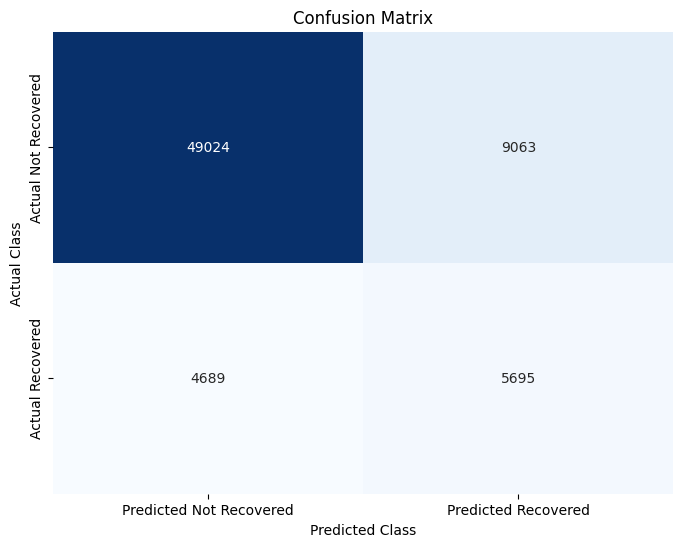

      Metric  Class 0 (Not Recovered)  Class 1 (Recovered)
0  Precision                     0.91                 0.39
1     Recall                     0.84                 0.55


In [ ]:
conf_matrix = [
    [49024, 9063],
    [4689, 5695]
]

df_cm = pd.DataFrame(conf_matrix, index=["Actual Not Recovered", "Actual Recovered"],
                     columns=["Predicted Not Recovered", "Predicted Recovered"])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

data = {
    'Metric': ['Precision', 'Recall'],
    'Class 0 (Not Recovered)': [0.91, 0.84],
    'Class 1 (Recovered)': [0.39, 0.55]
}
df_metrics = pd.DataFrame(data)

print(df_metrics)


In [ ]:
train_acc_tree = dt.score(X_train_selected, y_train_smote)
train_acc_logreg = log_reg.score(X_train_selected, y_train_smote)
train_acc_knn = knn.score(X_train_selected, y_train_smote)

print(f"Decision Tree Training Accuracy: {train_acc_tree:.4f}")
print(f"Logistic Regression Training Accuracy: {train_acc_logreg:.4f}")

Decision Tree Training Accuracy: 0.9820
Logistic Regression Training Accuracy: 0.9792


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X_train_selected, y_train_smote, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.97480552 0.9795134  0.98122368 0.98015705 0.98008312]
Mean CV Accuracy: 0.9791565554669251


In [ ]:
dt = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
dt.fit(X_train_selected, y_train_smote)

y_pred_dt = dt.predict(X_test_selected)
print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


=== Decision Tree ===
Accuracy: 0.7832366987483752
Confusion Matrix:
 [[47432 10655]
 [ 4187  6197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.86     58087
           1       0.37      0.60      0.46     10384

    accuracy                           0.78     68471
   macro avg       0.64      0.71      0.66     68471
weighted avg       0.84      0.78      0.80     68471



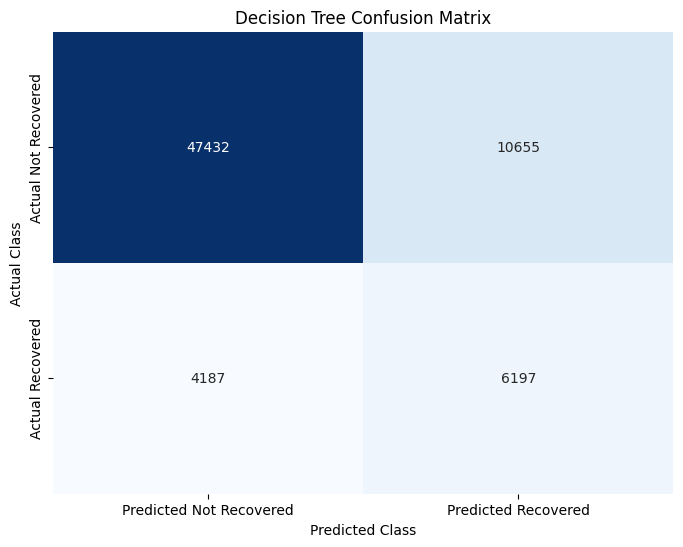

      Metric  Class 0 (Not Recovered)  Class 1 (Recovered)
0  Precision                     0.92                 0.37
1     Recall                     0.82                 0.60


In [ ]:
conf_matrix = [
    [47432, 10655],
    [4187, 6197]
]

df_cm = pd.DataFrame(conf_matrix, index=["Actual Not Recovered", "Actual Recovered"],
                     columns=["Predicted Not Recovered", "Predicted Recovered"])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

data = {
    'Metric': ['Precision', 'Recall'],
    'Class 0 (Not Recovered)': [0.92, 0.82],
    'Class 1 (Recovered)': [0.37, 0.60]
}
df_metrics = pd.DataFrame(data)

print(df_metrics)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected,  y_train_smote)

y_pred_knn = knn.predict(X_test_selected)
print("\n=== KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


=== KNN ===
Accuracy: 0.8577499963488192
Confusion Matrix:
 [[53039  5048]
 [ 4692  5692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     58087
           1       0.53      0.55      0.54     10384

    accuracy                           0.86     68471
   macro avg       0.72      0.73      0.73     68471
weighted avg       0.86      0.86      0.86     68471



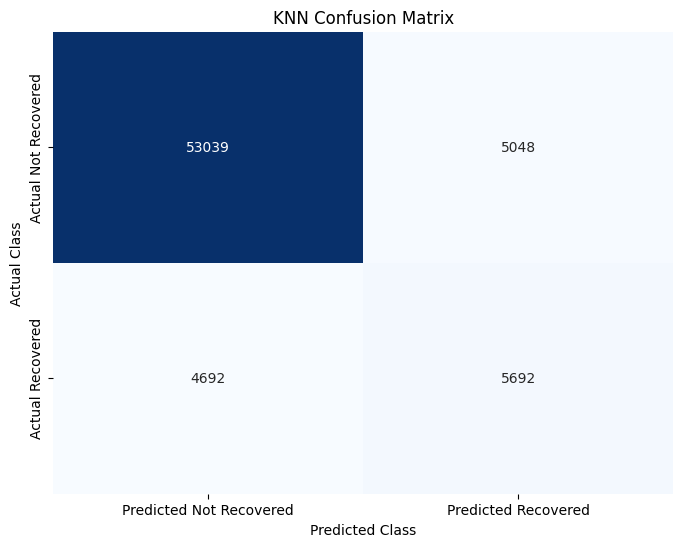

      Metric  Class 0 (Not Recovered)  Class 1 (Recovered)
0  Precision                     0.92                 0.53
1     Recall                     0.91                 0.55


In [ ]:
conf_matrix = [
    [53039, 5048],
    [4692, 5692]
]

df_cm = pd.DataFrame(conf_matrix, index=["Actual Not Recovered", "Actual Recovered"],
                     columns=["Predicted Not Recovered", "Predicted Recovered"])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

data = {
    'Metric': ['Precision', 'Recall'],
    'Class 0 (Not Recovered)': [0.92, 0.91],
    'Class 1 (Recovered)': [0.53, 0.55]
}
df_metrics = pd.DataFrame(data)

print(df_metrics)

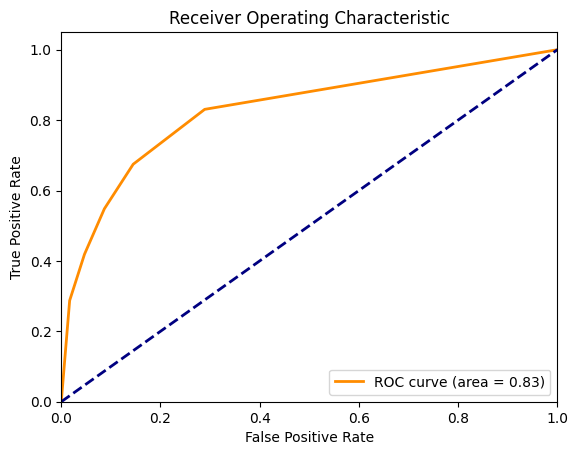

AUC-ROC: 0.82704713402374


In [ ]:
pred_prob = knn.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC:", roc_auc)

In [ ]:
from sklearn.model_selection import cross_val_score
for name, model in [("LogisticRegression", log_reg), ("DecisionTree", dt), ("KNN", knn), ("svm", svm)]:
    cv_scores = cross_val_score(model, X_train_selected, y_train_smote, cv=5, scoring='roc_auc')
    print(f"{name} CV ROC-AUC: {cv_scores.mean():.4f}")
    print(f"{name} CV Accuracy: {cv_scores.mean():.4f}")

LogisticRegression CV ROC-AUC: 0.8798
LogisticRegression CV Accuracy: 0.8798
DecisionTree CV ROC-AUC: 0.8459
DecisionTree CV Accuracy: 0.8459
KNN CV ROC-AUC: 0.9384
KNN CV Accuracy: 0.9384


In [ ]:
models_preds = {
    "LogisticRegression": y_pred_log,
    "DecisionTree": y_pred_dt,
    "KNN": y_pred_knn,

}

for mname, preds in models_preds.items():
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"{mname} -> Accuracy: {acc:.4f}, F1: {f1:.4f}")

    if mname == "LogisticRegression":
        prob = log_reg.predict_proba(X_test)[:,1]
    elif mname == "DecisionTree":
        prob = dt.predict_proba(X_test)[:,1]
    elif mname == "KNN":
        prob = knn.predict_proba(X_test)[:,1]

    auc = roc_auc_score(y_test, prob, average='weighted', multi_class='ovr')
    print(f"{mname} -> ROC AUC: {auc:.4f}\n")


LogisticRegression -> Accuracy: 0.6044, F1: 0.6662


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
models_preds = {
    "LogisticRegression": y_pred_log,
    "DecisionTree": y_pred_dt,
    "KNN": y_pred_knn,

}

for mname, preds in models_preds.items():
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"{mname} -> Accuracy: {acc:.4f}, F1: {f1:.4f}")

    if mname == "LogisticRegression":
        prob = log_reg.predict_proba(X_test)
    elif mname == "DecisionTree":
        prob = dt.predict_proba(X_test)
    elif mname == "KNN":
        prob = knn.predict_proba(X_test)

    if len(np.unique(y_test)) > 2:
        auc = roc_auc_score(y_test, prob, average='weighted', multi_class='ovr')
    else:
        auc = roc_auc_score(y_test, prob[:, 1], average='weighted')

    print(f"{mname} -> ROC AUC: {auc:.4f}\n")

LogisticRegression -> Accuracy: 0.6044, F1: 0.6662
LogisticRegression -> ROC AUC: 0.6563

DecisionTree -> Accuracy: 0.6352, F1: 0.6865
DecisionTree -> ROC AUC: 0.7758

KNN -> Accuracy: 0.8560, F1: 0.8431
KNN -> ROC AUC: 0.7786



In [ ]:
svm_clf = SVC(
    kernel='rbf',
    probability=True,
    random_state=42
)
svm_clf.fit(X_train_selected, y_train_smote)

y_pred_svm = svm_clf.predict(X_test_selected)
print("\n=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_train_selected)
pca.n_components_

np.int64(13)

In [ ]:
X_train_small = X_train_selected[:1000]
y_train_small = y_train_smote[:1000]

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_small, y_train_small)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred_svm = svm.predict(X_test_selected)
print("\n=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


=== SVM ===
Accuracy: 0.8508127528442698
Confusion Matrix:
 [[56695  1392]
 [ 8823  1561]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     58087
           1       0.53      0.15      0.23     10384

    accuracy                           0.85     68471
   macro avg       0.70      0.56      0.58     68471
weighted avg       0.81      0.85      0.81     68471



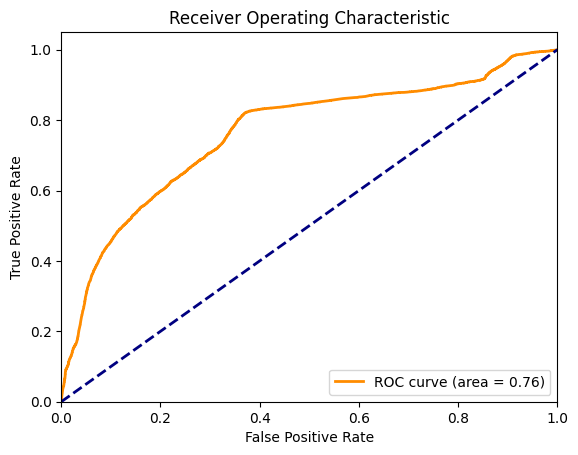

AUC-ROC: 0.761849005123896


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
pred_prob = svm.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Printing AUC
print("AUC-ROC:", roc_auc)

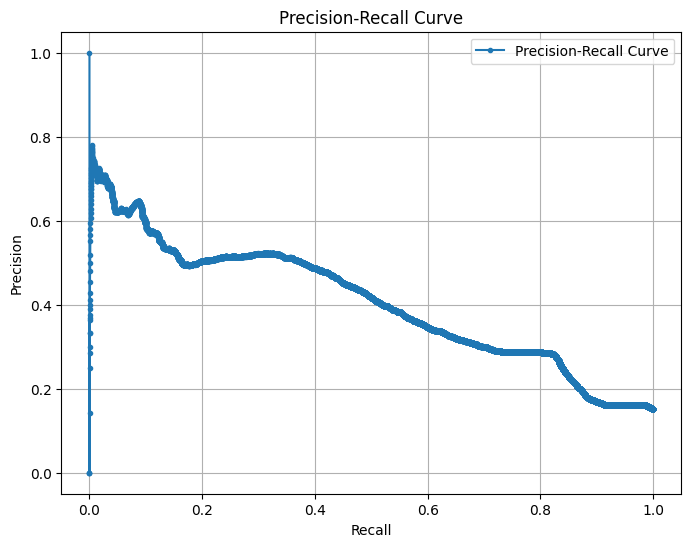

In [ ]:
from sklearn.metrics import precision_recall_curve
pred_prob = svm.predict_proba(X_test_selected)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear','poly']
}

model = SVC(probability=True, class_weight='balanced', random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1)

X_train_small = X_train_selected[:1000]
y_train_small = y_train_smote[:1000]

grid_search.fit(X_train_small, y_train_small)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
best_model.fit(X_train_small, y_train_small)
y_pred_svm = best_model.predict(X_test_selected)
print("\n=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


=== SVM ===
Accuracy: 0.7806808721940676
Confusion Matrix:
 [[48396  9691]
 [ 5326  5058]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87     58087
           1       0.34      0.49      0.40     10384

    accuracy                           0.78     68471
   macro avg       0.62      0.66      0.63     68471
weighted avg       0.82      0.78      0.80     68471

